# Compare phosphoplus and large scale

## Setup

In [ ]:
#| output: False
!pip install git+https://github.com/sky1ove/katlas.git -q

In [2]:
from katlas.core import *
from katlas.plot import *

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import spearmanr, pearsonr

In [3]:
sns.set(rc={"figure.dpi":200, 'savefig.dpi':200})
sns.set_context('notebook')
sns.set_style("ticks")

## Load data

In [11]:
df = Data.get_ks_dataset()

In [ ]:
df['SUB'] = df.substrate.str.upper()

In [12]:
PP = df.query('source == "pplus"').reset_index(drop=True)

LS = df.query('source == "large_scale"').reset_index(drop=True)

## Get overlap

In [14]:
cnt = PP[PP.kinase_paper.isin(LS.kinase_paper)].kinase_paper.value_counts()

In [15]:
overlap_PP = cnt[cnt>50]

## Calculate Pearson

In [19]:
data = []
for k in overlap_PP.index:

    
    PP_k = PP.query(f'kinase_paper=="{k}"')
    LS_k = LS.query(f'kinase_paper=="{k}"')
    
    # drop duplicates
    PP_k = PP_k.drop_duplicates(subset = 'SUB')
    LS_k = LS_k.drop_duplicates(subset = 'SUB')
    
    PP_cnt = PP_k.shape[0]
    LS_cnt = LS_k.shape[0]
    
    PP_paper, PP_full = get_freq(PP_k)
    LS_paper, LS_full = get_freq(LS_k)
    
#     plot_heatmap(PP_paper,f'{k}_PP')
#     plt.show()
#     plt.close()
    
#     plot_heatmap(LS_paper,f'{k}_LS')
#     plt.show()
#     plt.close()
    
    # Get column-wise pearson, then average
    # corr_average = PP_full.corrwith(LS_full).mean() # average pearson across each position
    
    # Get pearson of full heatmap, then average
    corr_full,_ = pearsonr(PP_full.unstack().values,LS_full.unstack().values)

    # print(f'correlation between PP and LS for {k} is: {corr}')
    # corr = plot_corr(PP_full.values.ravel(), LS_full.values.ravel())
    
    data.append([k,corr_full,PP_cnt,LS_cnt])

In [20]:
PP_LS = pd.DataFrame(data,columns=['kinase','pearson',
                                   'PP_cnt','LS_cnt'])

In [21]:
# PP_LS.to_csv('PP_LS_comparison.csv',index=False)

In [22]:
PP_LS.sort_values('pearson')

,kinase,pearson,PP_cnt,LS_cnt
38,LRRK2,0.435784,93,57
51,TTK,0.682803,68,26
53,CK1E,0.696732,61,281
23,MTOR,0.709667,146,40
56,CDK7,0.713317,58,148
...,...,...,...,...
0,PKACA,0.934050,986,577
2,CK2A1,0.938478,767,123
1,CDK1,0.938668,761,463
19,FYN,0.944152,198,1362


In [23]:
PP_LS['min_cnt'] = PP_LS[['PP_cnt','LS_cnt']].min(axis=1)

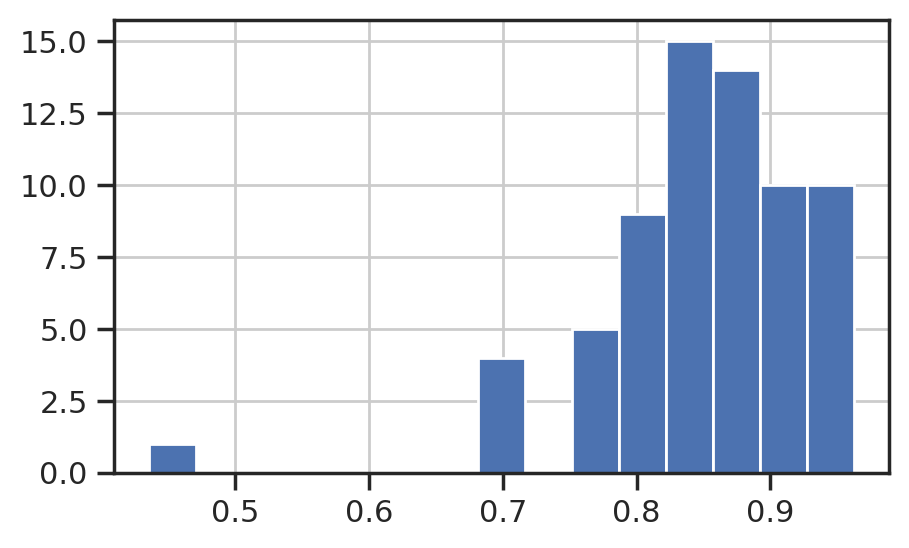

In [26]:
sns.set(rc={"figure.dpi":200, 'savefig.dpi':200})
sns.set_context('notebook')
sns.set_style("ticks")

plt.figure(figsize=(5,3))
PP_LS.pearson.hist(bins=15);

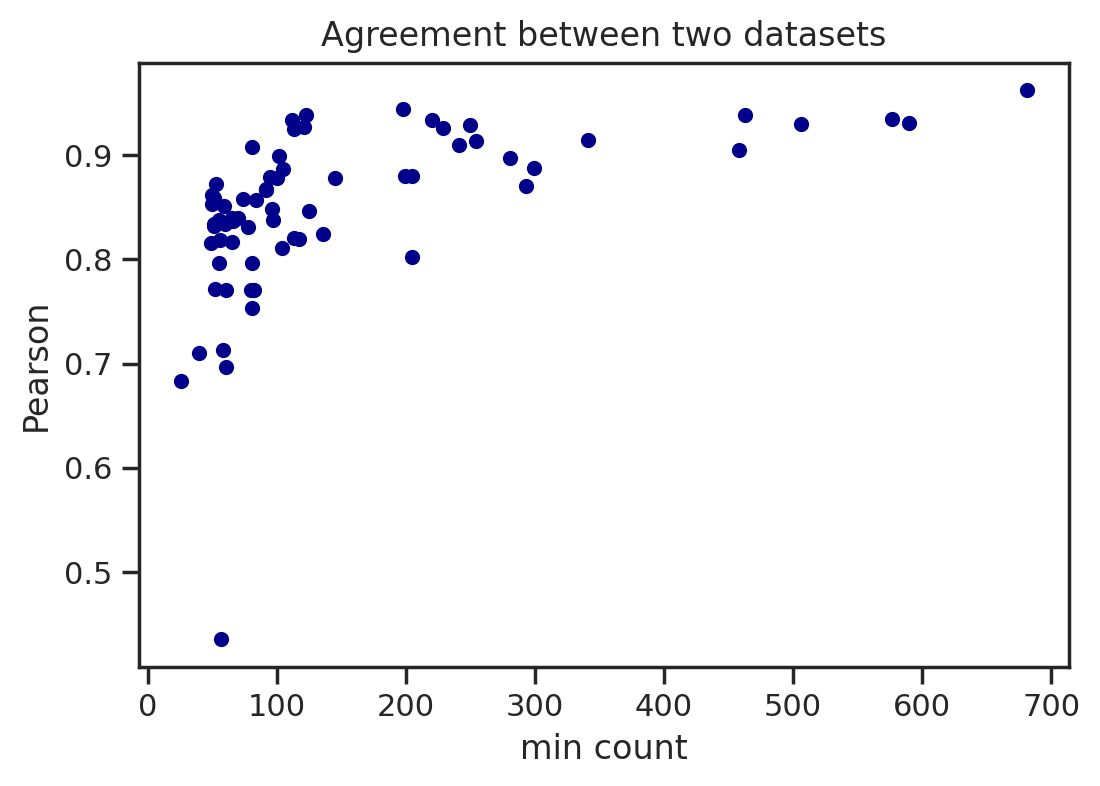

In [30]:
PP_LS.plot.scatter(y='pearson',x='min_cnt',c = 'DarkBlue')
plt.ylabel('Pearson')
plt.xlabel('min count')
plt.title('Agreement between two datasets');

## Examples

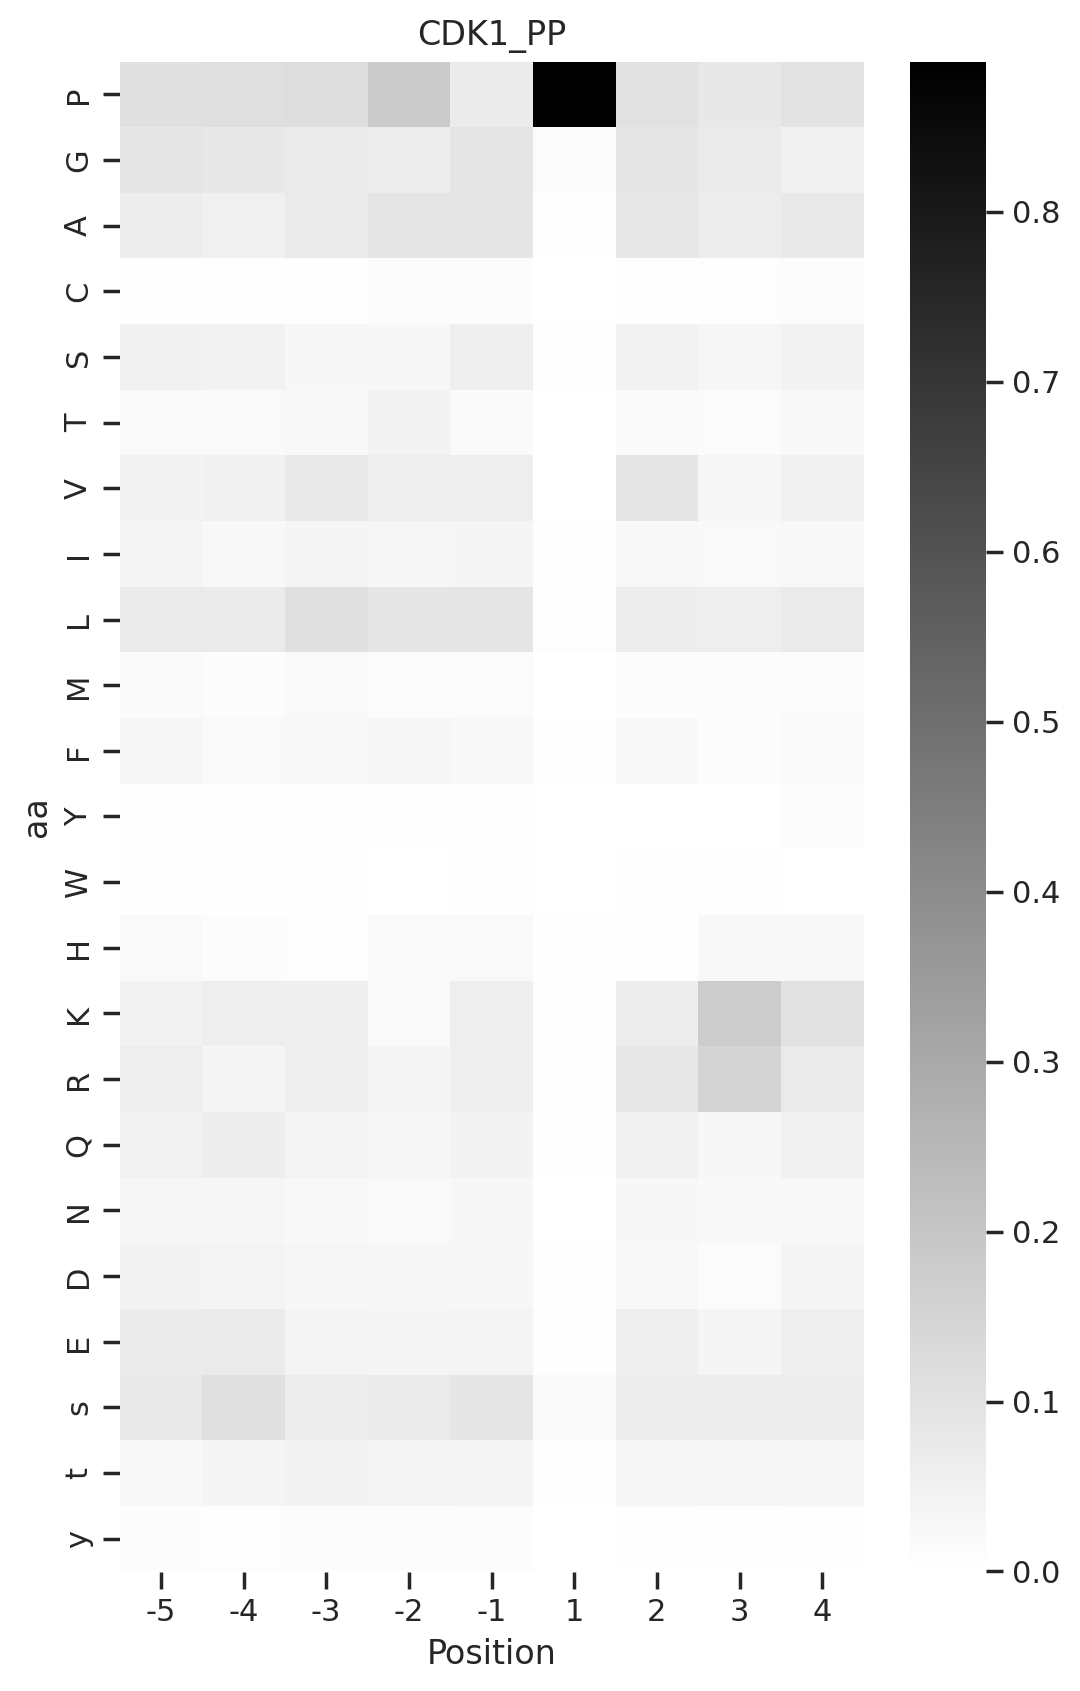

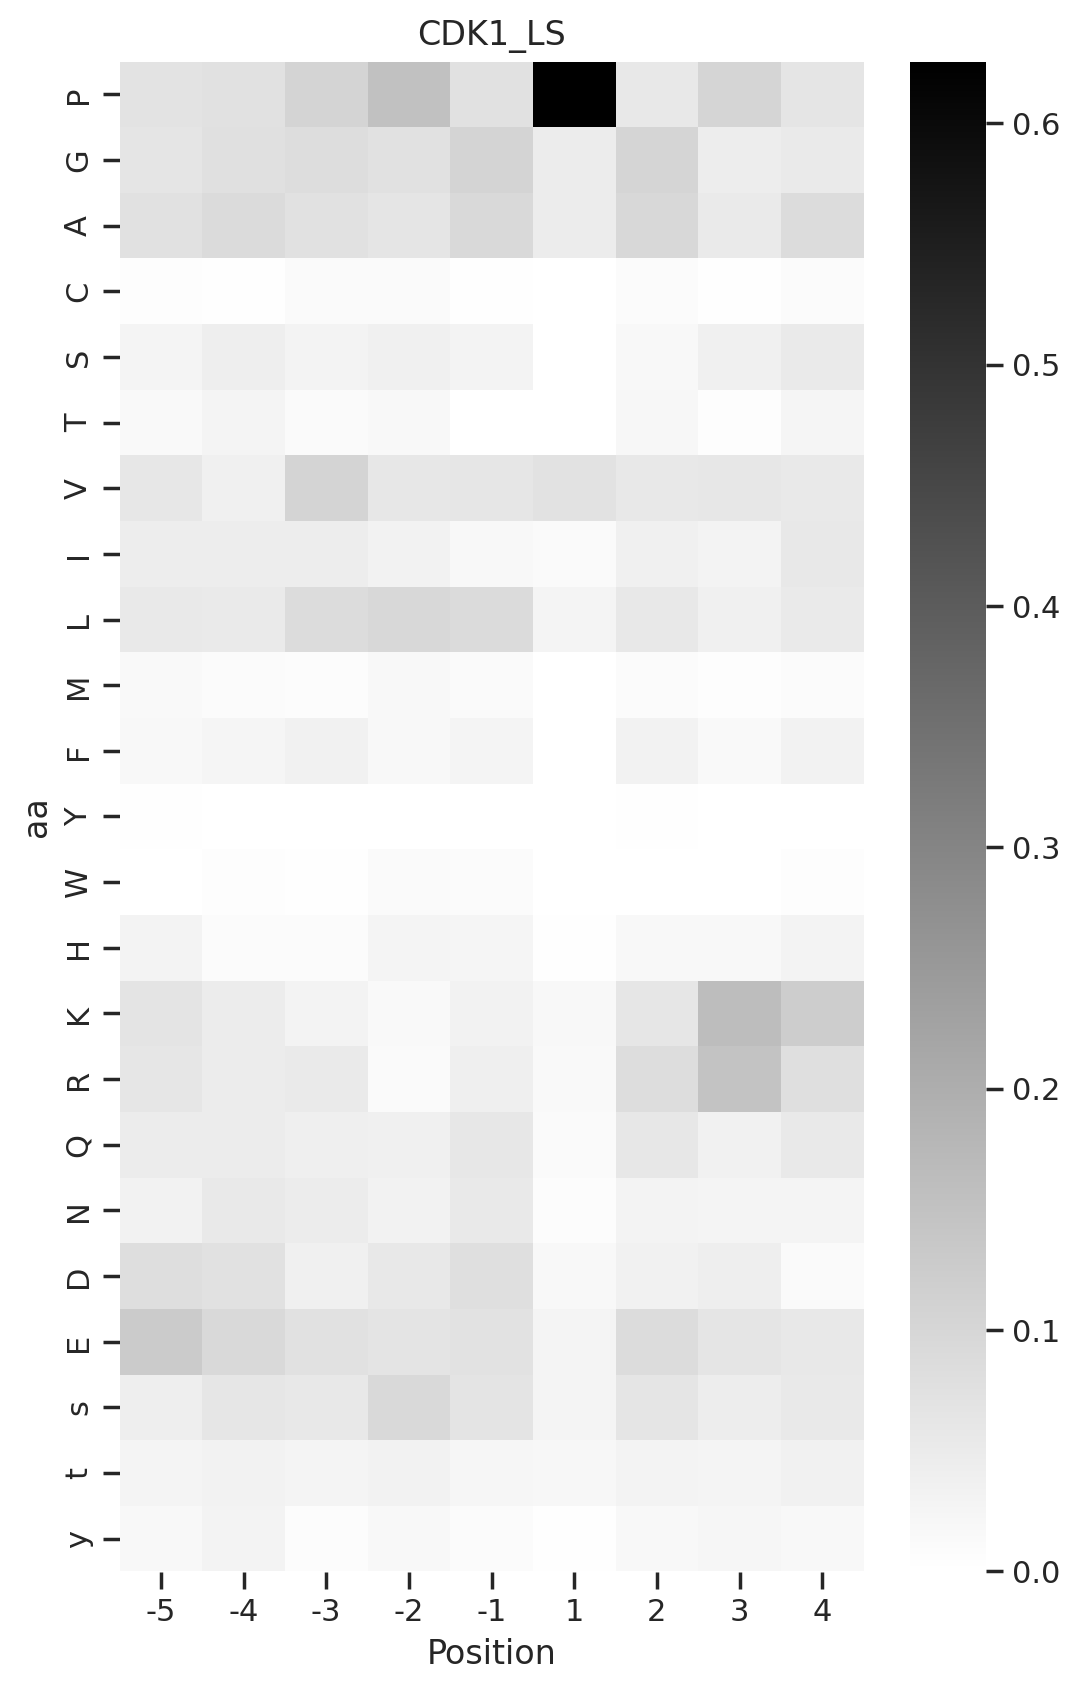

In [31]:
# Get one example
k = 'CDK1'

PP_k = PP.query(f'kinase_paper=="{k}"')
LS_k = LS.query(f'kinase_paper=="{k}"')

# drop duplicates
PP_k = PP_k.drop_duplicates(subset = 'SUB')
LS_k = LS_k.drop_duplicates(subset = 'SUB')


PP_paper, PP_full = get_freq(PP_k)
LS_paper, LS_full = get_freq(LS_k)


plot_heatmap(PP_paper,f'{k}_PP')
plot_heatmap(LS_paper,f'{k}_LS')

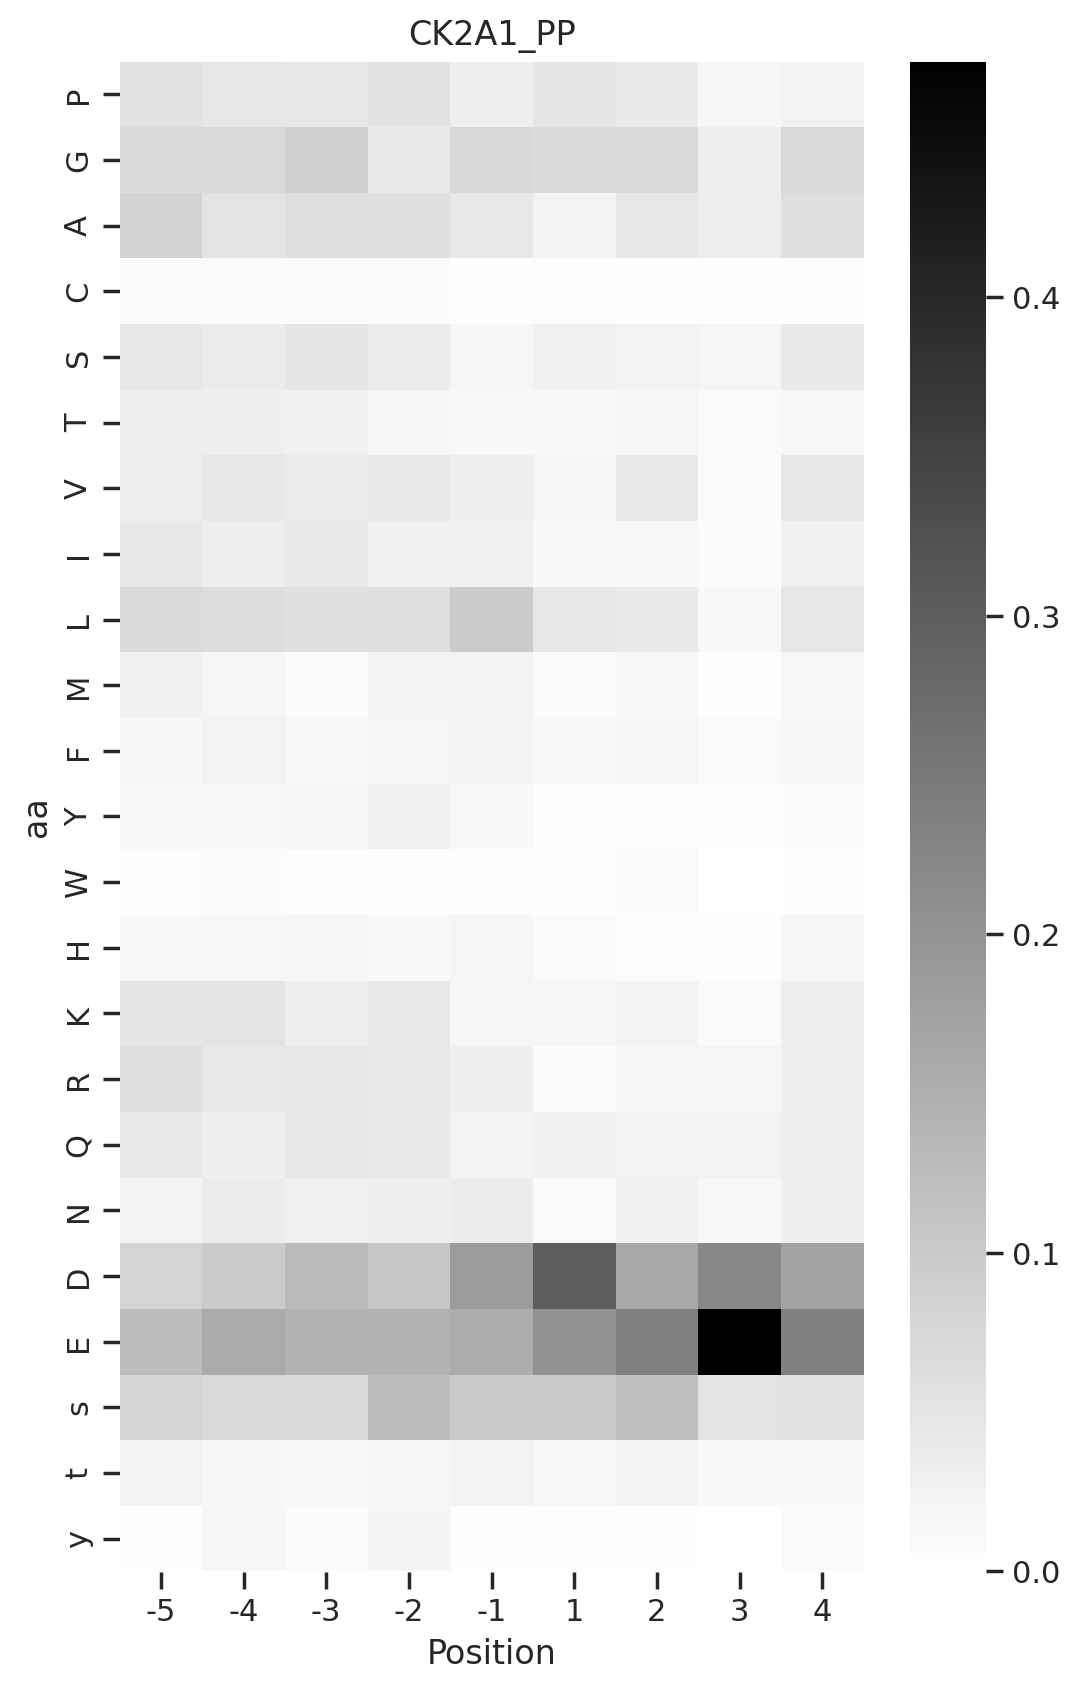

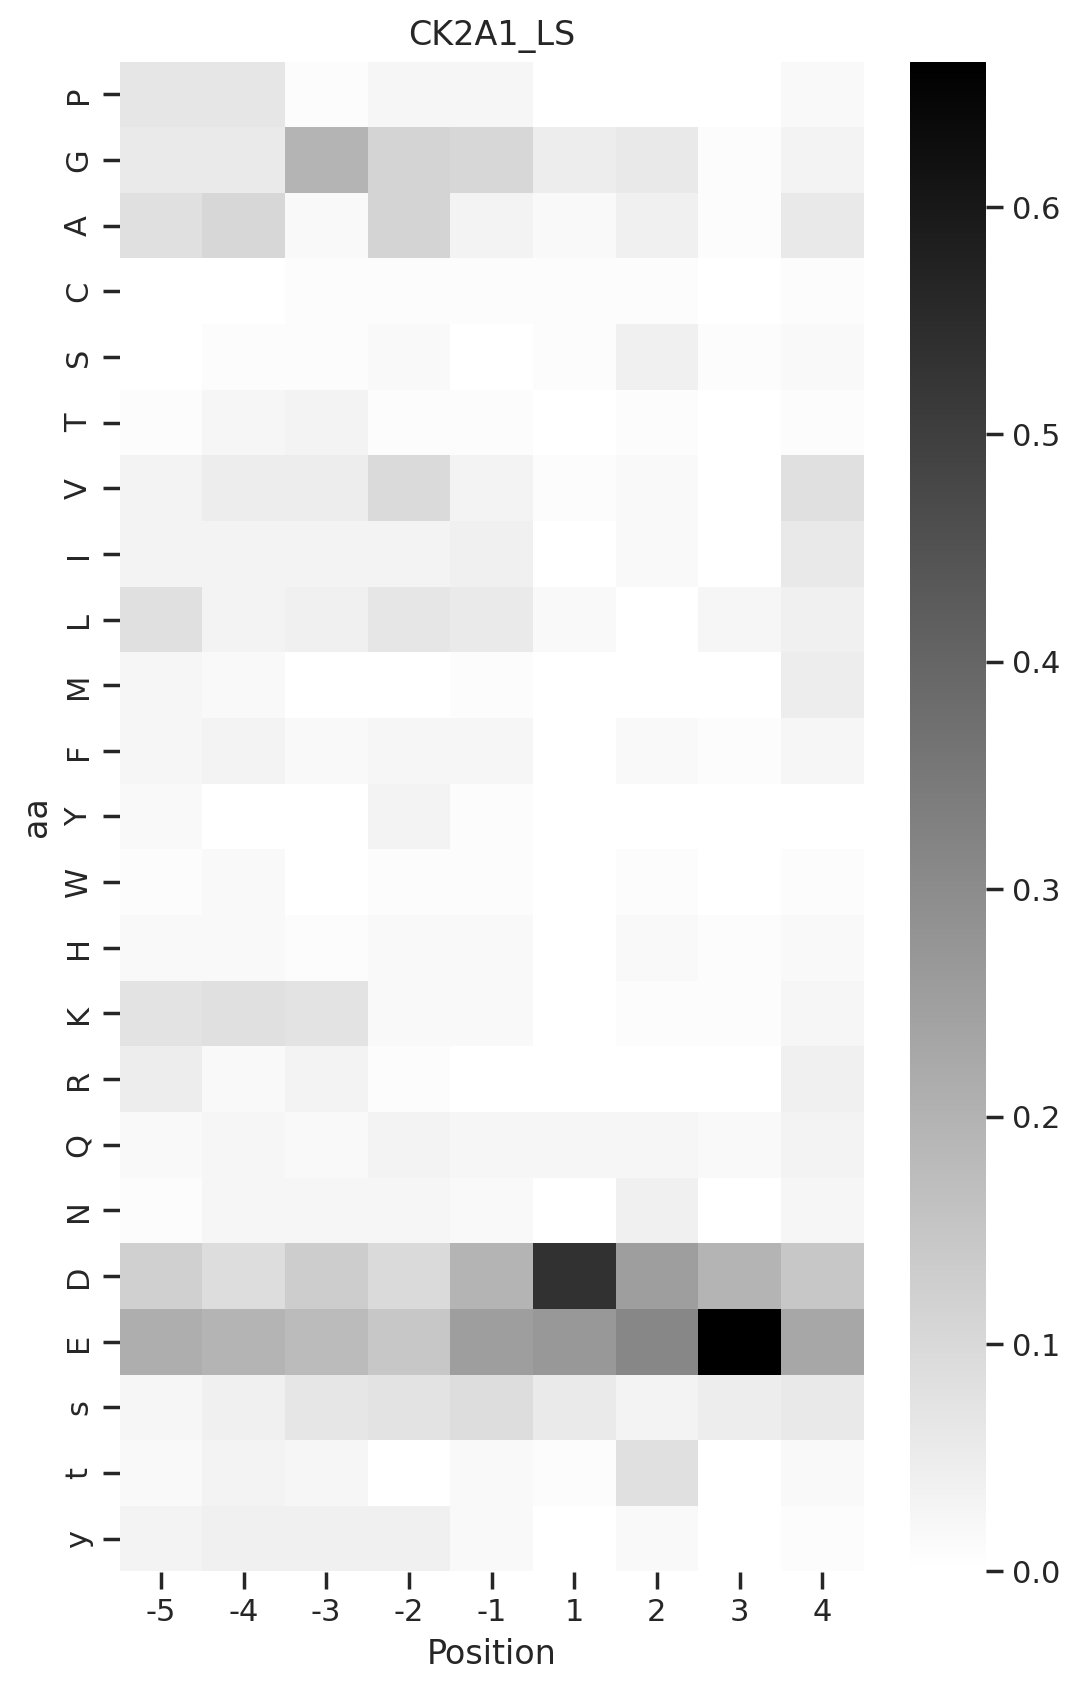

In [32]:
k = 'CK2A1'

PP_k = PP.query(f'kinase_paper=="{k}"')
LS_k = LS.query(f'kinase_paper=="{k}"')

# drop duplicates
PP_k = PP_k.drop_duplicates(subset = 'SUB')
LS_k = LS_k.drop_duplicates(subset = 'SUB')

PP_paper, PP_full = get_freq(PP_k)
LS_paper, LS_full = get_freq(LS_k)


plot_heatmap(PP_paper,f'{k}_PP')
plot_heatmap(LS_paper,f'{k}_LS')